In [1]:
import pandas
import io
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import plotly.express as px

from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [2]:
from scipy import optimize
from scipy.optimize import curve_fit

In [34]:
datos=pd.read_csv('rssIa.csv',header=None,names=['p1','p2','p3','p4','a1','a2','a3','a4'])
datos1=pd.read_csv('r1bbIa.csv',header=None,names=['p1','p2','p3','p4','a1','a2','a3','a4'])
datos2=pd.read_csv('r2bbIa.csv',header=None,names=['p1','p2','p3','p4','a1','a2','a3','a4'])
datos3=pd.read_csv('r3bbIa.csv',header=None,names=['p1','p2','p3','p4','a1','a2','a3','a4'])

In [3]:
datos=pd.read_csv('rsIa.csv',header=None,names=['p1','p2','p3','p4','a1','a2','a3','a4'])
datos1=pd.read_csv('r1bIa.csv',header=None,names=['p1','p2','p3','p4','a1','a2','a3','a4'])
datos2=pd.read_csv('r2bIa.csv',header=None,names=['p1','p2','p3','p4','a1','a2','a3','a4'])
datos3=pd.read_csv('r3bIa.csv',header=None,names=['p1','p2','p3','p4','a1','a2','a3','a4'])

In [92]:
datos=pd.read_csv('rs6Ia.csv',header=None,names=['p1','p2','p3','p4','p5','p6','a1','a2','a3','a4','a5','a6'])
datos1=pd.read_csv('r1b6Ia.csv',header=None,names=['p1','p2','p3','p4','p5','p6','a1','a2','a3','a4','a5','a6'])
datos2=pd.read_csv('r2b6Ia.csv',header=None,names=['p1','p2','p3','p4','p5','p6','a1','a2','a3','a4','a5','a6'])
datos3=pd.read_csv('r3b6Ia.csv',header=None,names=['p1','p2','p3','p4','p5','p6','a1','a2','a3','a4','a5','a6'])

In [93]:
datos=datos.assign(Falla=1) #sin barras rotas
datos1=datos1.assign(Falla=2) #con 1 barra rota
datos2=datos2.assign(Falla=3) #con 2 barra rota
datos3=datos3.assign(Falla=4) #con 3 barra rota

In [94]:
df=pd.concat([datos,datos1,datos2,datos3],ignore_index=True)
df

,p1,p2,p3,p4,p5,p6,a1,a2,a3,a4,a5,a6,Falla
0,13,20,26,32,38,62,6645.30,290.05,148.60,129.76,772.31,198.02,1
1,6,13,20,27,33,38,257.62,6602.40,385.82,146.62,105.31,863.73,1
2,6,13,20,32,38,63,232.63,6599.10,394.97,164.03,777.05,193.06,1
3,13,26,38,62,87,10152,6704.30,156.93,784.86,201.83,228.55,228.55,1
4,13,32,38,44,62,87,6577.80,156.19,902.83,125.99,264.45,249.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,7,13,19,26,32,38,466.54,6904.60,381.72,124.47,143.90,627.23,4
316,7,13,19,32,38,62,446.09,6909.20,313.20,141.17,593.81,230.09,4
317,5,13,20,32,38,62,218.96,7014.70,294.16,122.81,581.58,269.68,4
318,7,13,20,26,32,38,274.11,6958.50,327.59,142.50,100.56,655.82,4


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p1      320 non-null    int64  
 1   p2      320 non-null    int64  
 2   p3      320 non-null    int64  
 3   p4      320 non-null    int64  
 4   p5      320 non-null    int64  
 5   p6      320 non-null    int64  
 6   a1      320 non-null    float64
 7   a2      320 non-null    float64
 8   a3      320 non-null    float64
 9   a4      320 non-null    float64
 10  a5      320 non-null    float64
 11  a6      320 non-null    float64
 12  Falla   320 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 32.6 KB


In [96]:
df.describe()


,p1,p2,p3,p4,p5,p6,a1,a2,a3,a4,a5,a6,Falla
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.00000,320.000000,320.000000
mean,8.415625,16.215625,24.340625,32.359375,74.371875,933.812500,2240.547625,4959.822563,387.263844,265.200906,329.47650,368.776062,2.500000
std,2.937020,5.572020,6.874119,11.341061,563.877170,2848.324335,3018.679561,3022.904682,415.709253,238.868872,276.50715,256.993751,1.119785
min,3.000000,7.000000,13.000000,19.000000,25.000000,27.000000,102.970000,102.460000,101.640000,100.670000,100.03000,100.870000,1.000000
25%,6.000000,13.000000,19.000000,26.000000,32.000000,38.000000,281.487500,329.977500,188.050000,133.400000,123.76500,171.975000,1.750000
50%,7.000000,13.000000,20.000000,27.000000,38.000000,62.000000,396.050000,6727.800000,316.005000,166.795000,182.81000,244.275000,2.500000
75%,13.000000,20.000000,26.000000,38.000000,50.000000,63.000000,6687.850000,6919.325000,462.572500,218.547500,601.05750,647.442500,3.250000
max,13.000000,38.000000,62.000000,87.000000,10125.000000,10154.000000,7493.500000,7508.700000,6623.900000,1063.800000,1045.90000,923.900000,4.000000


In [97]:
freq=df.groupby(['p1','p2','p3','p4','p5','p6','a1','a2','a3','a4','a5','a6','Falla']).size()
freq

p1  p2  p3  p4  p5     p6     a1       a2       a3       a4      a5      a6      Falla
3   7   13  19  25     38     253.81   429.15   6623.90  323.00  129.00  635.77  3        1
5   13  20  26  32     38     286.28   6729.70  375.76   164.29  104.44  741.36  4        1
                              301.57   6645.00  400.57   183.41  123.27  764.36  4        1
            31  38     63     194.32   6600.50  466.24   141.03  829.94  162.65  4        1
            32  38     44     188.12   6626.00  454.49   177.49  728.65  103.96  4        1
                                                                                         ..
13  32  38  44  62     87     6924.00  153.12   939.50   115.39  248.49  283.46  2        1
                              7319.60  123.21   912.17   123.42  354.88  210.29  2        1
            45  56     62     6970.50  136.26   998.58   121.32  100.70  345.66  2        1
    33  38  62  87     10141  7050.80  133.37   980.54   259.25  258.42  258.42  2   

In [39]:
freq = df.groupby(['p1','p2','p3','p4','a1','a2','a3','a4','Falla']).size() 
freq


p1  p2  p3     p4     a1       a2       a3       a4       Falla
3   7   13     19     253.81   429.15   6623.90  323.00   3        1
5   13  20     38     250.91   6546.90  462.32   811.40   4        1
                      286.28   6729.70  375.76   741.36   4        1
                      301.57   6645.00  400.57   764.36   4        1
6   13  20     38     236.33   6749.00  400.66   703.96   4        1
                                                                  ..
13  38  10200  10225  6577.80  902.83   902.83   6577.80  1        1
                      6983.40  1071.00  1071.00  6983.40  2        1
        10201  10226  6704.30  784.86   784.86   6704.30  1        1
        10203  10228  7073.80  925.90   925.90   7073.80  2        1
        10204  10229  6924.00  939.50   939.50   6924.00  2        1
Length: 320, dtype: int64

C:\Users\GABRIEL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\GABRIEL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a

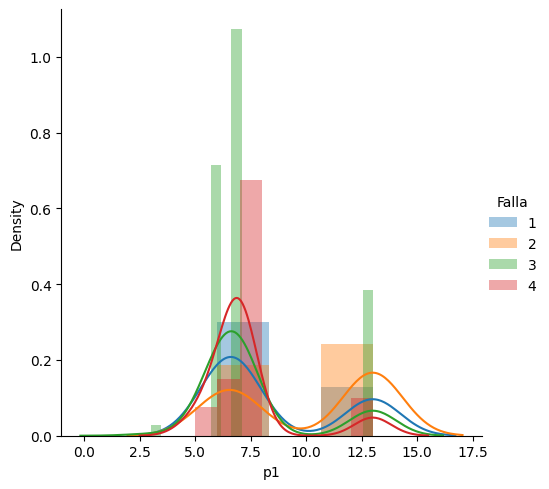

In [98]:
import seaborn as sns
sns.FacetGrid(df, hue='Falla', height=5).map(sns.distplot, 'p1').add_legend()

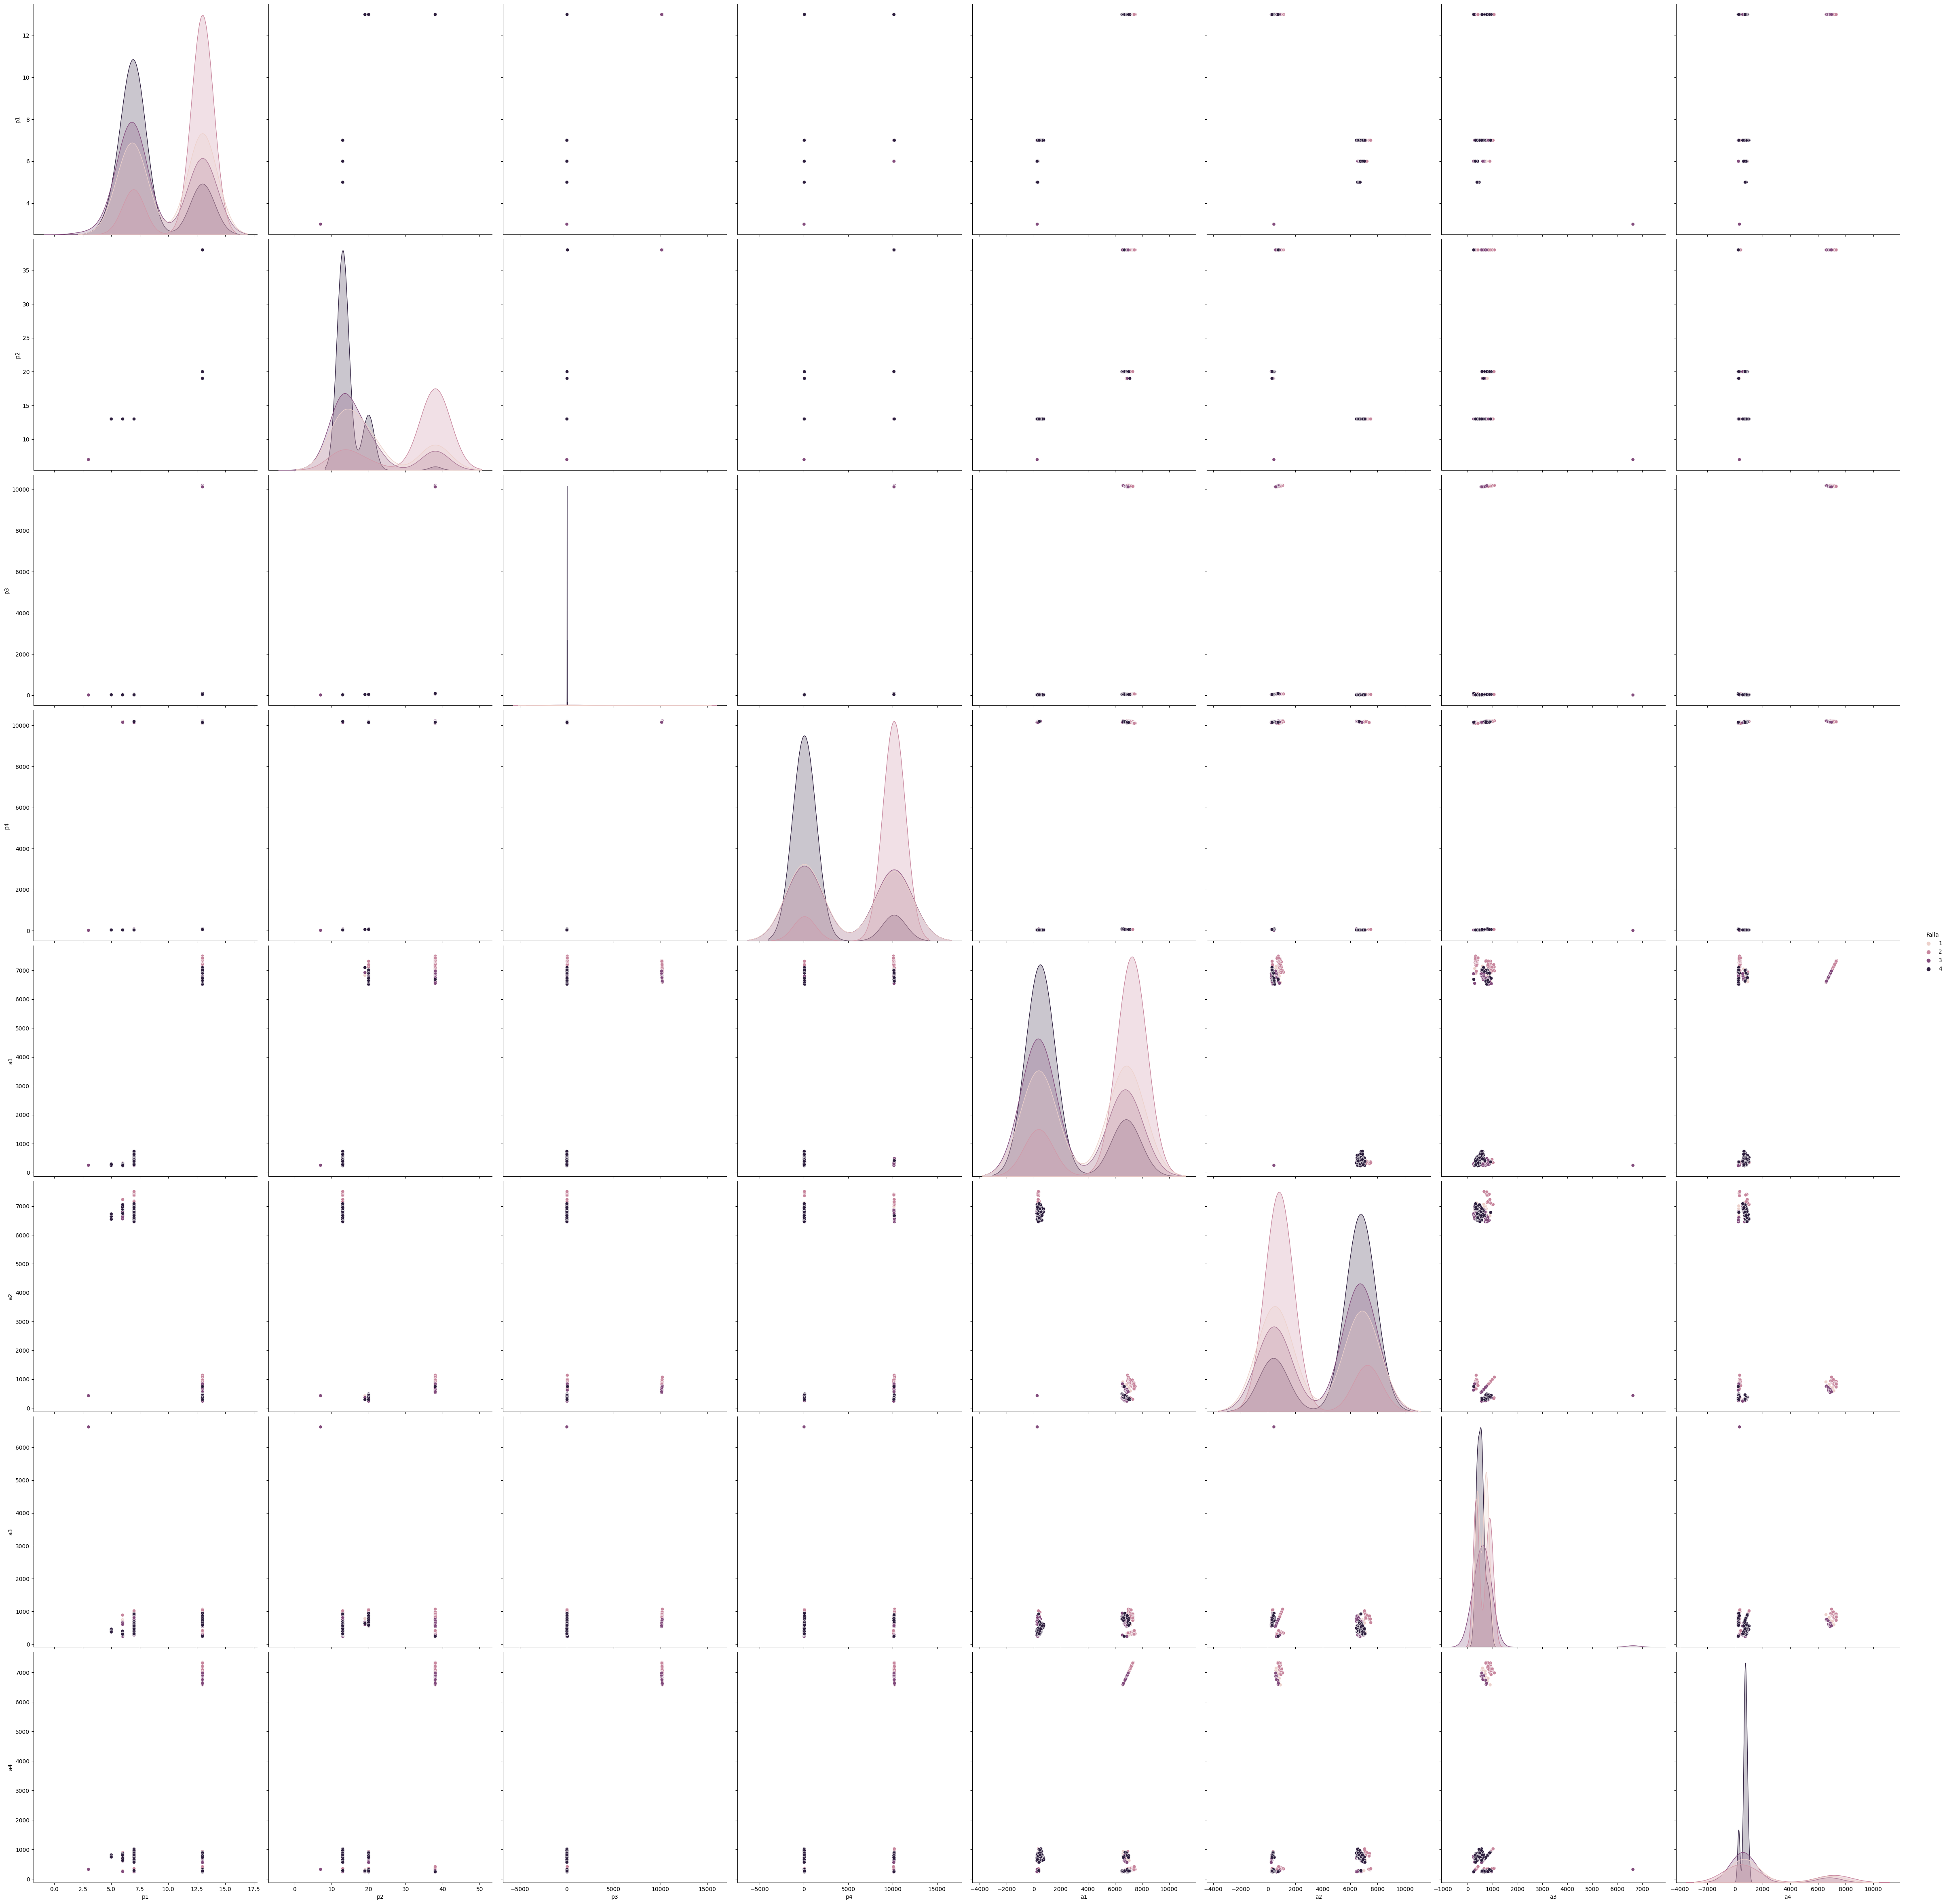

In [41]:
sns.pairplot(df, hue='Falla', height=6)
#plt.savefig('Distribuciones.png',bbox_inches='tight')
plt.show()

In [99]:
y=df['Falla']
y

0      1
1      1
2      1
3      1
4      1
      ..
315    4
316    4
317    4
318    4
319    4
Name: Falla, Length: 320, dtype: int64

In [100]:
x=df[['p1','p2','p3','p4','p5','p6','a1','a2','a3','a4','a5','a6']]
x

,p1,p2,p3,p4,p5,p6,a1,a2,a3,a4,a5,a6
0,13,20,26,32,38,62,6645.30,290.05,148.60,129.76,772.31,198.02
1,6,13,20,27,33,38,257.62,6602.40,385.82,146.62,105.31,863.73
2,6,13,20,32,38,63,232.63,6599.10,394.97,164.03,777.05,193.06
3,13,26,38,62,87,10152,6704.30,156.93,784.86,201.83,228.55,228.55
4,13,32,38,44,62,87,6577.80,156.19,902.83,125.99,264.45,249.82
...,...,...,...,...,...,...,...,...,...,...,...,...
315,7,13,19,26,32,38,466.54,6904.60,381.72,124.47,143.90,627.23
316,7,13,19,32,38,62,446.09,6909.20,313.20,141.17,593.81,230.09
317,5,13,20,32,38,62,218.96,7014.70,294.16,122.81,581.58,269.68
318,7,13,20,26,32,38,274.11,6958.50,327.59,142.50,100.56,655.82


In [43]:
x=df[['p1','p2','p3','p4','a1','a2','a3','a4']]
x

,p1,p2,p3,p4,a1,a2,a3,a4
0,13,20,38,10204,6645.30,290.05,772.31,772.31
1,13,20,38,10203,6602.40,385.82,863.73,863.73
2,13,20,38,10202,6599.10,394.97,777.05,777.05
3,13,38,10201,10226,6704.30,784.86,784.86,6704.30
4,13,38,10200,10225,6577.80,902.83,902.83,6577.80
...,...,...,...,...,...,...,...,...
315,7,13,19,38,466.54,6904.60,381.72,627.23
316,7,13,19,38,446.09,6909.20,313.20,593.81
317,13,20,38,62,7014.70,294.16,581.58,269.68
318,7,13,20,38,274.11,6958.50,327.59,655.82


Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=42)
rf = RandomForestClassifier(n_estimators=500, random_state=11).fit(x_train1, y_train1) 
prediction = rf.predict(x_test1)

In [103]:
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.7548584244463135
Precision:  0.75883430295195
Recall:  0.7791666666666667
Accuracy:  0.734375


In [104]:
confusion_matrix(y_test1, prediction)

array([[13,  1,  2,  4],
       [ 0, 12,  0,  0],
       [ 7,  0, 11,  2],
       [ 1,  0,  0, 11]], dtype=int64)

SVM

In [105]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [106]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(x_train1,y_train1)
prediction=clf.predict(x_test1)

In [107]:
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.3668518518518519
Precision:  0.38958333333333334
Recall:  0.41666666666666674
Accuracy:  0.375


In [108]:
confusion_matrix(y_test1, prediction)

array([[2, 6, 5, 7],
       [2, 7, 2, 1],
       [1, 2, 8, 9],
       [0, 0, 5, 7]], dtype=int64)

DTC

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dtc= DecisionTreeClassifier(criterion='entropy').fit(x_train1,y_train1)
prediction=dtc.predict(x_test1)

In [111]:
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.6832234321435773
Precision:  0.6850882981397688
Recall:  0.6958333333333333
Accuracy:  0.671875


In [112]:
confusion_matrix(y_test1, prediction)

array([[11,  2,  2,  5],
       [ 0, 11,  0,  1],
       [ 4,  0, 13,  3],
       [ 3,  0,  1,  8]], dtype=int64)

KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
neigh = KNeighborsClassifier().fit(x_train1,y_train1)
prediction=neigh.predict(x_test1)
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.7006060606060606
Precision:  0.7221153846153846
Recall:  0.6916666666666668
Accuracy:  0.6875


In [115]:
confusion_matrix(y_test1, prediction)

array([[15,  0,  2,  3],
       [ 1, 10,  0,  1],
       [ 6,  0, 12,  2],
       [ 3,  0,  2,  7]], dtype=int64)

K fold

In [116]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=100,shuffle=True)
kf

KFold(n_splits=10, random_state=100, shuffle=True)

In [117]:
for entrenamiento_indice,prueba_indice in kf.split(x):
    x_entrenamiento, x_prueba=x.iloc[entrenamiento_indice],x.iloc[prueba_indice]
    y_entrenamiento, y_prueba=y.iloc[entrenamiento_indice],y.iloc[prueba_indice]
    #x_entrenamiento=x_entrenamiento.values.reshape([x_entrenamiento.values.shape[0],1])
    #x_prueba=x_prueba.values.reshape([x_prueba.values.shape[0],1])
    rf = RandomForestClassifier(n_estimators=500, random_state=11).fit(x_entrenamiento,y_entrenamiento)
    y_pred=rf.predict(x_prueba)
    
    #plot_confusion_matrix(rf, x_prueba, y_prueba) 
    #plt.show()
    
    f1 = f1_score(y_prueba, y_pred, average="macro")
    precision = precision_score(y_prueba, y_pred, average="macro")
    recall = recall_score(y_prueba, y_pred, average="macro")
    accuracy = accuracy_score(y_prueba, y_pred, normalize=True)
    print('F1: ',f1)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('--------------------------')

F1:  0.7679379444085326
Precision:  0.7633928571428572
Recall:  0.8035714285714286
Accuracy:  0.78125
--------------------------
F1:  0.7976190476190476
Precision:  0.8142857142857143
Recall:  0.825
Accuracy:  0.78125
--------------------------
F1:  0.767361111111111
Precision:  0.775
Recall:  0.76875
Accuracy:  0.75
--------------------------
F1:  0.7563994828700712
Precision:  0.749107142857143
Recall:  0.7674603174603174
Accuracy:  0.75
--------------------------
F1:  0.7708174178762414
Precision:  0.7848214285714286
Recall:  0.7646825396825396
Accuracy:  0.78125
--------------------------
F1:  0.6287301587301587
Precision:  0.6321733821733821
Recall:  0.628968253968254
Accuracy:  0.71875
--------------------------
F1:  0.6978947368421053
Precision:  0.714102564102564
Recall:  0.7083333333333333
Accuracy:  0.78125
--------------------------
F1:  0.6766254578754579
Precision:  0.6841179653679653
Recall:  0.6770833333333333
Accuracy:  0.71875
--------------------------
F1:  0.62457205

In [118]:
for entrenamiento_indice,prueba_indice in kf.split(x):
    x_entrenamiento, x_prueba=x.iloc[entrenamiento_indice],x.iloc[prueba_indice]
    y_entrenamiento, y_prueba=y.iloc[entrenamiento_indice],y.iloc[prueba_indice]
    #x_entrenamiento=x_entrenamiento.values.reshape([x_entrenamiento.values.shape[0],1])
    #x_prueba=x_prueba.values.reshape([x_prueba.values.shape[0],1])
    clf = make_pipeline(StandardScaler(), SVC(C=3,gamma='auto')).fit(x_entrenamiento,y_entrenamiento)
    y_pred=clf.predict(x_prueba)
       
    #plot_confusion_matrix(clf, x_prueba, y_prueba) 
    #plt.show()
    
    f1 = f1_score(y_prueba, y_pred, average="macro")
    precision = precision_score(y_prueba, y_pred, average="macro")
    recall = recall_score(y_prueba, y_pred, average="macro")
    accuracy = accuracy_score(y_prueba, y_pred, normalize=True)
    print('F1: ',f1)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('--------------------------')

F1:  0.5023809523809524
Precision:  0.49375
Recall:  0.5535714285714286
Accuracy:  0.53125
--------------------------
F1:  0.5426555299539171
Precision:  0.53125
Recall:  0.5604166666666667
Accuracy:  0.625
--------------------------
F1:  0.4618055555555555
Precision:  0.45982142857142855
Recall:  0.48958333333333337
Accuracy:  0.46875
--------------------------
F1:  0.5465686274509804
Precision:  0.554861111111111
Recall:  0.5571428571428572
Accuracy:  0.5625
--------------------------
F1:  0.4534798534798534
Precision:  0.6087662337662337
Recall:  0.45992063492063495
Accuracy:  0.5
--------------------------
F1:  0.47602339181286546
Precision:  0.5184704184704185
Recall:  0.49503968253968256
Accuracy:  0.5
--------------------------
F1:  0.3824420677361854
Precision:  0.42083333333333334
Recall:  0.4166666666666667
Accuracy:  0.40625
--------------------------
F1:  0.4715686274509804
Precision:  0.47857142857142854
Recall:  0.4666666666666667
Accuracy:  0.5
--------------------------

In [119]:
for entrenamiento_indice,prueba_indice in kf.split(x):
    x_entrenamiento, x_prueba=x.iloc[entrenamiento_indice],x.iloc[prueba_indice]
    y_entrenamiento, y_prueba=y.iloc[entrenamiento_indice],y.iloc[prueba_indice]
    #x_entrenamiento=x_entrenamiento.values.reshape([x_entrenamiento.values.shape[0],1])
    #x_prueba=x_prueba.values.reshape([x_prueba.values.shape[0],1])
    dtc= DecisionTreeClassifier(criterion='entropy').fit(x_entrenamiento,y_entrenamiento)
    y_pred=dtc.predict(x_prueba)
       
    #plot_confusion_matrix(dtc, x_prueba, y_prueba) 
    #plt.show()
    
    f1 = f1_score(y_prueba, y_pred, average="macro")
    precision = precision_score(y_prueba, y_pred, average="macro")
    recall = recall_score(y_prueba, y_pred, average="macro")
    accuracy = accuracy_score(y_prueba, y_pred, normalize=True)
    print('F1: ',f1)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('--------------------------')

F1:  0.8035714285714286
Precision:  0.7946428571428572
Recall:  0.8285714285714286
Accuracy:  0.8125
--------------------------
F1:  0.8531746031746031
Precision:  0.8428571428571427
Recall:  0.8875
Accuracy:  0.84375
--------------------------
F1:  0.7742889420520999
Precision:  0.7847222222222222
Recall:  0.7729166666666667
Accuracy:  0.78125
--------------------------
F1:  0.6606643356643357
Precision:  0.6803030303030304
Recall:  0.6484126984126984
Accuracy:  0.65625
--------------------------
F1:  0.7253621743753322
Precision:  0.7333333333333333
Recall:  0.7257936507936509
Accuracy:  0.75
--------------------------
F1:  0.6637627877237853
Precision:  0.6701388888888888
Recall:  0.6646825396825397
Accuracy:  0.75
--------------------------
F1:  0.6952380952380952
Precision:  0.7291666666666667
Recall:  0.7083333333333333
Accuracy:  0.78125
--------------------------
F1:  0.78125
Precision:  0.78125
Recall:  0.78125
Accuracy:  0.8125
--------------------------
F1:  0.56640211640211

In [120]:
for entrenamiento_indice,prueba_indice in kf.split(x):
    x_entrenamiento, x_prueba=x.iloc[entrenamiento_indice],x.iloc[prueba_indice]
    y_entrenamiento, y_prueba=y.iloc[entrenamiento_indice],y.iloc[prueba_indice]
    #x_entrenamiento=x_entrenamiento.values.reshape([x_entrenamiento.values.shape[0],1])
    #x_prueba=x_prueba.values.reshape([x_prueba.values.shape[0],1])
    neigh = KNeighborsClassifier().fit(x_entrenamiento,y_entrenamiento)
    y_pred=neigh.predict(x_prueba)
       
    #plot_confusion_matrix(neigh, x_prueba, y_prueba) 
    #plt.show()
    
    f1 = f1_score(y_prueba, y_pred, average="macro")
    precision = precision_score(y_prueba, y_pred, average="macro")
    recall = recall_score(y_prueba, y_pred, average="macro")
    accuracy = accuracy_score(y_prueba, y_pred, normalize=True)
    print('F1: ',f1)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('--------------------------')

F1:  0.6058897243107769
Precision:  0.6414141414141414
Recall:  0.5928571428571429
Accuracy:  0.625
--------------------------
F1:  0.71875
Precision:  0.7556818181818182
Recall:  0.728125
Accuracy:  0.6875
--------------------------
F1:  0.6199404761904762
Precision:  0.6591346153846154
Recall:  0.63125
Accuracy:  0.59375
--------------------------
F1:  0.711203560371517
Precision:  0.7118055555555555
Recall:  0.7174603174603175
Accuracy:  0.6875
--------------------------
F1:  0.4747571269310399
Precision:  0.5255681818181819
Recall:  0.5253968253968253
Accuracy:  0.5625
--------------------------
F1:  0.5328282828282828
Precision:  0.5303030303030303
Recall:  0.5535714285714286
Accuracy:  0.65625
--------------------------
F1:  0.6115864527629233
Precision:  0.6458333333333334
Recall:  0.7083333333333333
Accuracy:  0.65625
--------------------------
F1:  0.6261904761904762
Precision:  0.6507936507936508
Recall:  0.6145833333333333
Accuracy:  0.65625
--------------------------
F1:  0

In [121]:
from sklearn.neural_network import MLPClassifier

In [122]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(1000,500), max_iter=1000, activation='relu', solver='adam', random_state=42)

In [123]:
mlp_classifier.fit(x_train1, y_train1)

MLPClassifier(hidden_layer_sizes=(1000, 500), max_iter=1000, random_state=42)

In [124]:
prediction=mlp_classifier.predict(x_test1)

In [125]:
f1 = f1_score(y_test1, prediction, average="macro")
precision = precision_score(y_test1, prediction, average="macro")
recall = recall_score(y_test1, prediction, average="macro")
accuracy = accuracy_score(y_test1, prediction, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.23695993715632363
Precision:  0.24217325227963524
Recall:  0.3041666666666667
Accuracy:  0.359375


C:\Users\GABRIEL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
